# Encontrar las raices de una función

Existen dos métodos: de bipartición y de Newton.

### Método de Bipartición

Toma como ptos iniciales a dos valores de de $x_0,x_1$ tales que:
$$
f(x_0)>0 \ \ \ \ \ \ \ f(x_1)<0
$$

Posteriormente se toma el punto medio entre $x_0,x_1$:
$$
x_2=\frac{x_0+x_1}{2}
$$

Se evalua $x_2$ en la función y se analiza si:
$$
f(x_2)>0 \ \ \ o \ \ \ \ f(x_2)<0
$$

Dependiendo del resultado, se elige como nuevo intervalo $[x_0,x_2]$ o $[x_2,x_1]$.

El paso se repite hasta que:

$$
|x_i-x_j|<\epsilon \ \ \ y \ \ \  |f(x_i)-f(x_j)|<\epsilon
$$

donde episilon es un número que el usuario eligió dependiendo de lo que necesita.

NOTA: éste algoritmo sólo sirve si la función cruza el eje, si son funciones pares como $x^2$, $x^4$, ... el algoritmo no funciona.

In [8]:
from pylab import*
%matplotlib inline

In [37]:
def biparticion(f,x_i,x_d,err=1e-5):
    raiz=0.5*(x_i+x_d)
    y_i,y_d=f(x_i),f(x_d)
    while abs(raiz-x_d) >=err and abs(y_i-y_d)>=err:
        y_m=f(raiz)
        if y_m == 0.:
            print "ya tenemos la raiz!"
            break
        if y_m*y_i < 0:
            x_d=raiz
        else:
            x_i=raiz
        raiz=0.5*(x_i+x_d)
        y_i,y_d=f(x_i),f(x_d)
    return raiz

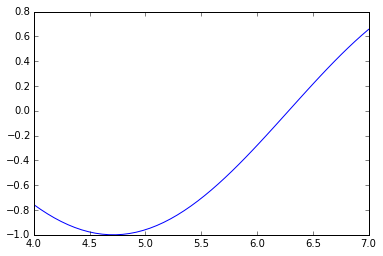

In [38]:
x=linspace(4,7)
plot(x,sin(x))
show()

In [36]:
print "La raiz es: ", biparticion(sin,5,7)
print "Notemos que el valor de 2pi es: ",2*pi
print "Así que el error es: ", 2*pi-biparticion(sin,5,7)

La raiz es:  6.28318023682
Notemos que el valor de 2pi es:  6.28318530718
Así que el error es:  5.07036317998e-06


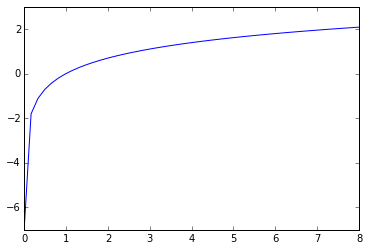

In [39]:
x=linspace(0.001,8)
plot(x,log(x))
show()

In [19]:
biparticion(log,0.001,8)

0.9999977293014525

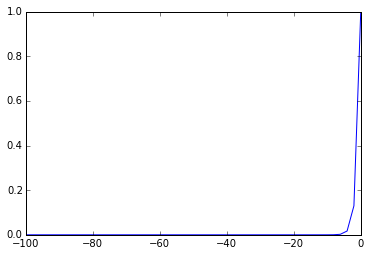

In [40]:
x=linspace(-100,0)
plot(x,exp(x))
show()

In [32]:
biparticion(exp(x),-10,0)
#como no hay x tal que exp(x)<0, el programa no puede dar un resultado :(

TypeError: 'numpy.ndarray' object is not callable

### Método de Newton